**Prediktiv analyse** 
  
Vår prediktive analyse er basert på historisk værdata mellom 01.01.2023 til 01.05.2025 fra 3 ulike byer - Steinkjer, Molde & Ålesund. 

In [15]:
# Setter opp miljø og henter inn data
import os
import sys
sys.path.append(os.path.abspath("../src"))

from datetime import datetime
from fetch_data import fetch_data_from_frost
from process_data import process_and_clean_data
from visualize_data import plot_scatterplot
from regression_model import train_model_for_city

# Leser inn datasettet
file_path = '../data/weekly_weather_data.csv'
df = pd.read_csv(file_path)
df['Time'] = pd.to_datetime(df['Time'])
print("Data loaded")

Data loaded



Training model for SN62295:0...
R² score for SN62295:0: 0.07
MSE for SN62295:0: 183.05


/Users/eier/Documents/GitHub/Miljo-dataanalyse#/src/visualize_data.py:122: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


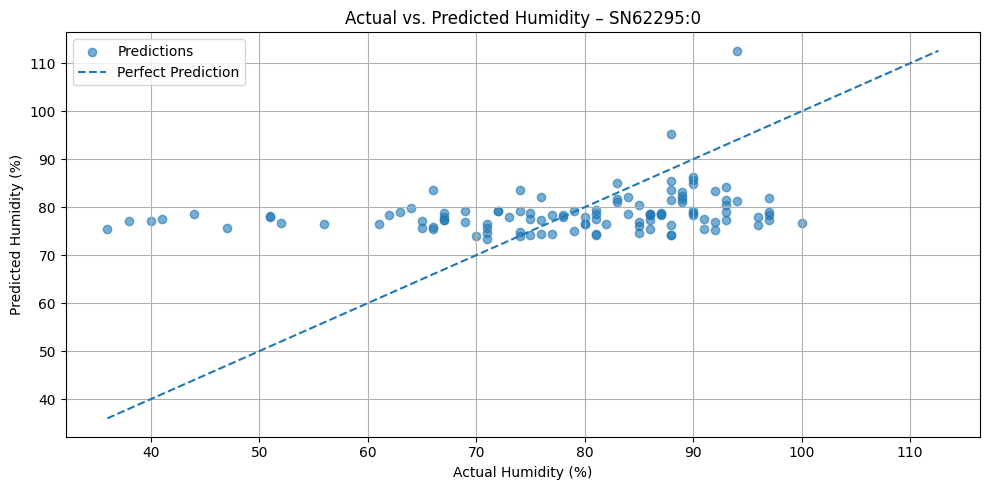


Training model for SN60945:0...
R² score for SN60945:0: 0.03
MSE for SN60945:0: 139.26


/Users/eier/Documents/GitHub/Miljo-dataanalyse#/src/visualize_data.py:122: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


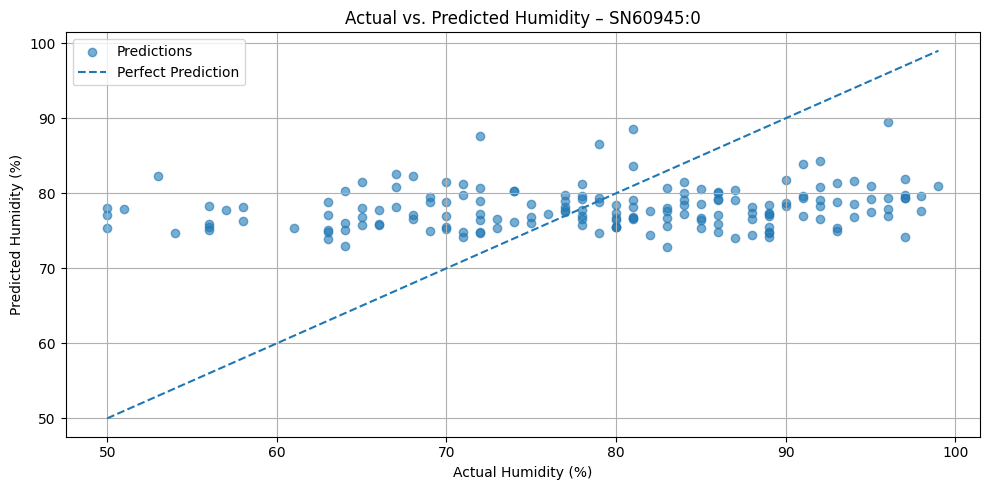


Training model for SN70680:0...
R² score for SN70680:0: 0.28
MSE for SN70680:0: 113.37


/Users/eier/Documents/GitHub/Miljo-dataanalyse#/src/visualize_data.py:122: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


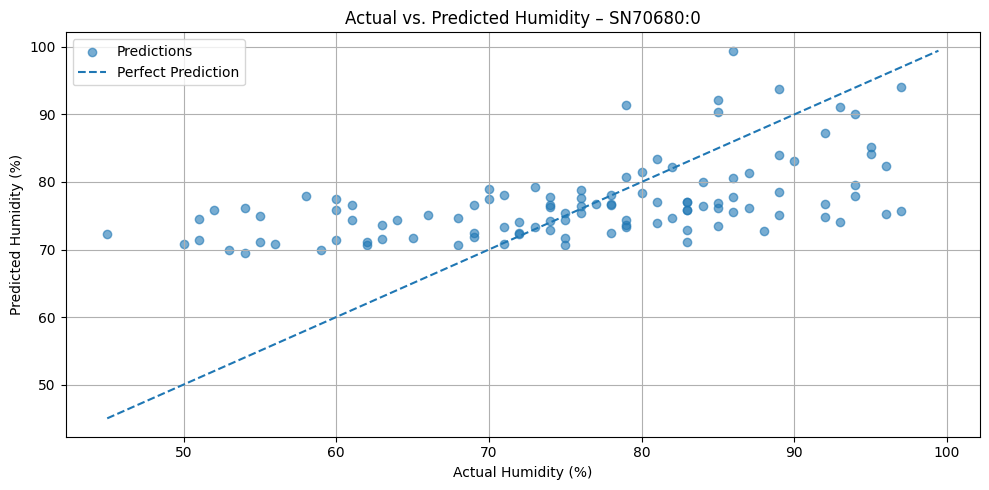

In [16]:
# Visualiserer scatterplotene samt R²-score og MSE
for city in df['Location'].unique():
    model, y_test, y_pred = train_model_for_city(df, city)
    plot_scatterplot(y_test, y_pred, city)

Grafene ovenfor viser resultatene av en regresjonsmodell trent for å forutsi luftfuktighet basert på historisk værdata. 
   
X-aksen viser faktisk målt luftfuktighet i % og y-aksen viser predikert luffuktighet av regresjonsmodellen. Hvert punkt representerer en observasjon, som sier noe om hvor godt modellen treffer på en bestemt dag. Den striplede linjen viser perfekt prediksjon, altså hvordan modellen hadde hatt 100% treff. Som vi ser i de 3 ulike modellene ovenfor så sprer punktene seg bort fra linjenen noe som bety at modellen har større feil. 

Steinkjer - den gule linjen     
Her ser vi at de fleste prediksjonene er under den gule linjen, noe som antyder at modellen konsekvent undervurderer luftfuktigheten. Steinkjer oppnådde en R²-score på 0,25 som betyr at modellen forklarer ca. 25% av variasjonen i dataene. Helhetlig antyder dette at Steinkjer viser en svak/moderat modell. Steinkjer har en MSE på 103,71, noe som indikerer at modellen ikke er særlig presis, men det er heller ikke helt tilfeldig. 

Molde - den blå linjen  
Her ser vi at de fleste prediksjonene er under den blå linjen. Siden de fleste punktene ligger langt unna den predikerte linjen betyr det at modellen ofte bommer. Molde hadde en R²-score på 0,12 som indikerer at ca. 12% av variasjonen i luftfuktighet. Modellen klarer ikke å forutsi luftfuktighet med særlig nøyaktighet. MSE for Molde var 126,67 som forteller oss at modellen har omtrent 11 prosentpoeng feil.

Ålesund - den oransje linjen   
De fleste punktene ligger lang unna den predikerte linjen som betyr at den ofte har svak prediksjon. Ålesund har en oppnådd R²-score på o,o5 som vil si at kun 5% av variasjonen i luftfuktighet forklares av modellen. MSE for Ålesund var 141,47 som viser at modellen har omtrent 12 prosentpoeng feil. Visualiseringen av Ålesund vil gi nesten samme prediksjon uansett input, ettersom den ikke lærer reelle variasjoner i dataen. 